In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import layers, Input, models, optimizers
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

C:\Users\LHJ\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LHJ\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LHJ\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LHJ\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\f

### pattern 별로 이미지 선별했기 때문에 따로 불러와서 분류 작업 불필요

## pattern 분류 모델 생성

In [ ]:
# generator = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range = 20,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
#     rescale = 1. / 255)

In [2]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', use_bias=False, input_shape=(150,150, 3)))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dropout(0.2))
 
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))                                   # label, calss 갯수
model.summary()
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      432       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 16)      48        
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 32)        4608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 38, 38, 32)        96        
__________

## compile 및 데이터 불러오기

In [3]:
# Compiling the CNN

from keras.optimizers import Adam
optimizer = Adam(lr=0.001)

model.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


# 데이터 셋
train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=10,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.7,
#                                    zoom_range=[0.9, 2.2],
#                                    horizontal_flip=True,
#                                    vertical_flip=True,
#                                    fill_mode='nearest',
                                   validation_split=0.33)
 
training_set = train_datagen.flow_from_directory('C:/Users/LHJ/Desktop/style_test',
                                                 target_size = (150,150),
                                                 batch_size = 10,
                                                 class_mode = 'categorical',
                                                 subset="training"
                                                )
validation_set = train_datagen.flow_from_directory('C:/Users/LHJ/Desktop/style_test',
                                                 target_size = (150,150),
                                                 batch_size = 10,
                                                 class_mode = 'categorical',
                                                 subset="validation"
                                                  )
 

Found 810 images belonging to 3 classes.
Found 397 images belonging to 3 classes.


## 모델 학습

In [ ]:
# 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문
# 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상

In [ ]:
# 모델 예측
# predict는 확률을, predict_classes는 label 값을 알려줌

In [4]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


# moniter: 대상 값, mode: min/max, verbose=1 설정시 언제 멈췄는지 출력
# patience: 성능없는 에폭 허용 범위, baseline: 값 설정

#es = EarlyStopping(monitor='val_loss', mode='min')
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [5]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('best_model_pattern_416.h5', monitor='val_loss', mode='min', save_best_only=True)

In [6]:
hist = model.fit_generator(training_set,
                         steps_per_epoch = 15, #20
                         epochs = 500,  #1000
                         validation_data = validation_set,
                         validation_steps = 10,
                         callbacks=[es,mc])
 

Epoch 1/500
15/15 [==============================] - 28s 2s/step - loss: 1.7419 - acc: 0.3667 - val_loss: 1.0984 - val_acc: 0.4500
Epoch 2/500
15/15 [==============================] - 27s 2s/step - loss: 1.2407 - acc: 0.3933 - val_loss: 1.0634 - val_acc: 0.4300
Epoch 3/500
15/15 [==============================] - 25s 2s/step - loss: 1.2598 - acc: 0.4333 - val_loss: 1.0050 - val_acc: 0.4000
Epoch 4/500
15/15 [==============================] - 28s 2s/step - loss: 1.2466 - acc: 0.4467 - val_loss: 1.2468 - val_acc: 0.3100
Epoch 5/500
15/15 [==============================] - 26s 2s/step - loss: 1.1120 - acc: 0.4467 - val_loss: 1.1314 - val_acc: 0.3900
Epoch 6/500
15/15 [==============================] - 26s 2s/step - loss: 0.9869 - acc: 0.4333 - val_loss: 1.0589 - val_acc: 0.4700
Epoch 7/500
15/15 [==============================] - 26s 2s/step - loss: 1.0567 - acc: 0.4667 - val_loss: 0.9848 - val_acc: 0.4600
Epoch 8/500
15/15 [==============================] - 26s 2s/step - loss: 1.1093 - a

Epoch 125/500
15/15 [==============================] - 20s 1s/step - loss: 0.5787 - acc: 0.7333 - val_loss: 1.1155 - val_acc: 0.5800
Epoch 126/500
15/15 [==============================] - 20s 1s/step - loss: 0.4916 - acc: 0.7667 - val_loss: 1.5213 - val_acc: 0.5100
Epoch 127/500
15/15 [==============================] - 19s 1s/step - loss: 0.6839 - acc: 0.7333 - val_loss: 1.2513 - val_acc: 0.5000
Epoch 128/500
15/15 [==============================] - 19s 1s/step - loss: 0.6322 - acc: 0.7200 - val_loss: 1.5276 - val_acc: 0.4600
Epoch 129/500
15/15 [==============================] - 20s 1s/step - loss: 0.7200 - acc: 0.6600 - val_loss: 1.1847 - val_acc: 0.5600
Epoch 130/500
15/15 [==============================] - 20s 1s/step - loss: 0.5659 - acc: 0.7467 - val_loss: 1.4566 - val_acc: 0.4500
Epoch 131/500
15/15 [==============================] - 20s 1s/step - loss: 0.6939 - acc: 0.6867 - val_loss: 0.9694 - val_acc: 0.5700
Epoch 132/500
15/15 [==============================] - 26s 2s/step - 

## 학습 결과 확인: 그래프

---validation chage---


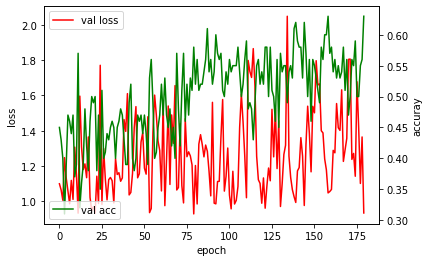

In [7]:
import matplotlib.pyplot as plt
 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
 
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

print('---validation chage---') 
plt.show()

---training change---


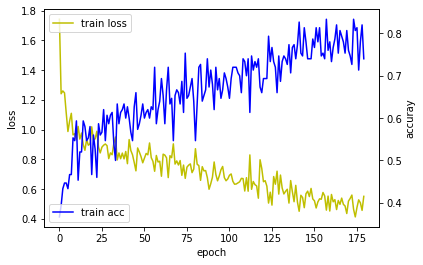

In [8]:
import matplotlib.pyplot as plt
 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
print('---training change---') 
plt.show()

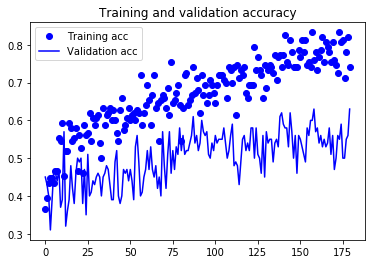

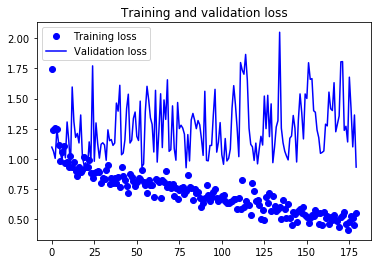

In [9]:
# 다른 방식으로 나타낸 그래프

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 학습 결과 확인: 정확도 및 예측

In [10]:
# 모델 평가하기
print("-- Evaluate : training acc --") 
train_scores = model.evaluate_generator(
               training_set,
               steps = 10) 
print("%s: %.2f%%" %(model.metrics_names[1], train_scores[1]*100))
print('\n')


print("-- Evaluate : validation acc --") 
vali_scores = model.evaluate_generator(
            validation_set,
            steps = 10) 
print("%s: %.2f%%" %(model.metrics_names[1], vali_scores[1]*100))


-- Evaluate : training acc --
acc: 90.00%


-- Evaluate : validation acc --
acc: 63.00%


## 모델 저장

In [11]:
# 모델 저장


from keras.models import load_model, model_from_json
model.save('model_style_3개_90%_63%.h5')                      # 모델(architecture, weight 동시 저장) 저장 이름


# 모델 아키텍처를 json 형, 식으로 저장                 # 모델 architecture 만 저장 
#json_string = model.to_json()                       # json 파일에서 모델 아키텍처 재구성
#model = model_from_json(json_string) 


# 모델 Weights 저장
# model.save_weights('파일이름')
